In [81]:
#librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import seaborn as sns
import re
import random
from scipy.spatial.distance import cdist
# import pyclustertend 
import sklearn.preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [82]:
#cargar los datos
df = pd.read_csv("movies.csv", encoding="latin1")

# 1. Exploración de datos

In [83]:
#exploracion de los datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df.columns))

#resumen del set de datos
print("\n--Resumen del set de datos:--")
print(df.describe())



--Columnas:---
['id', 'budget', 'genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime', 'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'popularity', 'releaseDate', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

--Resumen del set de datos:--
                  id        budget       revenue       runtime    popularity  \
count   10000.000000  1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean   249876.829300  1.855163e+07  5.673793e+07    100.268100     51.393907   
std    257380.109004  3.662669e+07  1.495854e+08     27.777829    216.729552   
min         5.000000  0.000000e+00  0.000000e+00      0.000000      4.258000   
25%     12286.500000  0.000000e+00  0.000000e+00     90.000000     14.577750   
50%    152558.000000  5.000000e+05  1.631245e+05    10

In [84]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df.dtypes)
tipos_de_datos = df.dtypes.value_counts()
print('resumen:')
print(tipos_de_datos)



----Tipo de datos:---
id                             int64
budget                         int64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount               object
castMenAmount  

---
# 2. Tipo de variables 

### Variables:
1. Id: Id de la película 

2. popularity: Índice de popularidad de la película calculado semanalmente 

3. budget: El presupuesto para la película. 

4. revenue: El ingreso de la película. 

5. original_title: El título original de la película, en su idioma original. 

6. originalLanguage: Idioma original en que se encuentra la película 

7. title: El título de la película traducido al inglés 

8. homePage: La página de inicio de la película 

9. video: Si tiene videos promocionales o no 

10. director: Director de la película 

11. runtime: La duración de la película. 

12. genres: El género de la película. 

13. genresAmount: Cantidad de géneros que representan la película 

14. productionCompany: Las compañías productoras de la película. 

15. productionCoAmount: Cantidad de compañías productoras que participaron en la película 

16. productionCompanyCountry: Países de las compañías productoras de la película 

17. productionCountry: Países en los que se llevó a cabo la producción de la película 

18. productionCountriesAmount: Cantidad de países en los que se rodó la película 


19. releaseDate: Fecha de lanzamiento de la película 

20. voteCount: El número de votos en la plataforma para la película. 

21. voteAvg: El promedio de los votos en la plataforma para la película 


22. actors: Actores que participan en la película (Elenco) 

23. actorsPopularity: Índice de popularidad del elenco de la película. 

24. actorsCharacter: Personaje que interpreta cada actor en la película 

25. actorsAmount: Cantidad de personas que actúan en la película 

26. castWomenAmount: Cantidad de actrices en el elenco de la película 

27. castMenAmount: Cantidad de actores en el elenco de la película. 

## Tipo de Varibles
### Variables Cualitativas:
#### Ordinales:
- No hay
 
#### Nominales:
- original_title
- originalLanguage
- title
- homePage
- director
- genres
- productionCompany
- productionCompanyCountry
- productionCountry
- video
- actors
- actorsCharacter


### Variables Cuantitativas:
#### Continuas:
- popularity
- revenue
- voteAvg


#### Discretas:
- Id
- releaseDate
- budget
- runtime
- genresAmount
- productionCoAmount
- productionCountriesAmount
- voteCount
- actorsPopularity
- actorsAmount
- castWomenAmount
- castMenAmount


In [85]:
# revision de valores duplicados
print(df.duplicated().sum())

0


In [86]:
# eliminar valores nulos o llenarlos con la media
df = df.dropna()

#llenar los valores nulos de video
df['video'].fillna('FALSE', inplace=True)

#calcular la media de solo las columnas numericas
mean_values = df.select_dtypes(include=[np.number]).mean()

#reemplazar valores nulos con la media
df.fillna(mean_values, inplace=True)


/tmp/ipykernel_6366/2643670234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video'].fillna('FALSE', inplace=True)


In [87]:
#convertir los tipos de datos
#convertir la columna video a numerica
df['video'] = df['video'].apply(lambda x: 1 if str(x).upper() == 'TRUE' else 0)

#convertir la columna releaseDate a datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

#convertir las columnas popularity, revenue y voteAvg a enteros
df['popularity'] = df['popularity'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['voteAvg'] = df['voteAvg'].astype(int)

#asegurarse que todas las variables sean de tipo int
df['castWomenAmount'] = df['castWomenAmount'].astype(int)
df['castMenAmount'] = df['castMenAmount'].astype(int)

#asegurarse que runtime no tenga valores negativos
df['runtime'] = df['runtime'].apply(lambda x: x if x > 0 else 0)
# df[df['runtime'] >= 0 ] #elimina los valores negativos
if (df['runtime'] < 0).any():
    print("Aún hay valores negativos en 'runtime'.")
else:
    print("Todos los valores negativos en 'runtime' han sido corregidos.")


Todos los valores negativos en 'runtime' han sido corregidos.


In [88]:
#limpiar los datos de la populariadad de actores
# Eliminar caracteres no numerricos y convertir a float e ignorar los nombres
def clean_popularity(popularity_list):
    numeric_values = []
    for value in popularity_list:
        try:
            numeric_values.append(float(re.sub(r'\D', '', value)))
        except ValueError:
            pass  # ignorar los xd
    return numeric_values

df['actorsPopularity'] = df['actorsPopularity'].str.split('|').apply(clean_popularity)

#promedio de popularidad
df['actorsPopularity_avg'] = df['actorsPopularity'].apply(lambda x: sum(x) / len(x) if x else 0)
print((df['actorsPopularity_avg']))

0       10386.160000
10       2820.183099
11       5757.305556
14       5035.864865
16       8124.315789
            ...     
9955       41.800000
9968     1706.625000
9979     8349.208333
9982    13318.918919
9988     6537.390244
Name: actorsPopularity_avg, Length: 3507, dtype: float64


In [89]:
#limpiar tambien genero
df['genres'] = df['genres'].str.split('|')
print(df['genres'])

print('generos princiales:')
df['genero_principal'] = df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
print(df['genero_principal'])


0                    [Crime, Comedy]
10      [Adventure, Fantasy, Action]
11                   [Action, Crime]
14                      [Drama, War]
16       [Animation, Comedy, Family]
                    ...             
9955           [War, History, Drama]
9968                [Romance, Drama]
9979            [Music, Documentary]
9982                   [Documentary]
9988                        [Comedy]
Name: genres, Length: 3507, dtype: object
generos princiales:
0             Crime
10        Adventure
11           Action
14            Drama
16        Animation
           ...     
9955            War
9968        Romance
9979          Music
9982    Documentary
9988         Comedy
Name: genero_principal, Length: 3507, dtype: object


In [90]:
#normalizacion de datos
#no se deben de normalizar todos los dato, entonces los de 
#nobmres de las columans que no se van a normalizar, porque no es necesario
#columans que si se van a normalizar
numeric_columns = ['actorsAmount', 'runtime']
print(numeric_columns)
#normalizar los datos
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())


['actorsAmount', 'runtime']
    id     budget                        genres  \
0    5    4000000               [Crime, Comedy]   
10  22  140000000  [Adventure, Fantasy, Action]   
11  24   30000000               [Action, Crime]   
14  28   31500000                  [Drama, War]   
16  35   75000000   [Animation, Comedy, Family]   

                                             homePage  \
0           https://www.miramax.com/movie/four-rooms/   
10  http://disney.go.com/disneyvideos/liveaction/p...   
11    http://www.miramax.com/movie/kill-bill-volume-1   
14                       http://www.apocalypsenow.com   
16                      http://www.simpsonsmovie.com/   

                                    productionCompany  \
0                                Miramax|A Band Apart   
10       Walt Disney Pictures|Jerry Bruckheimer Films   
11                               Miramax|A Band Apart   
14                   United Artists|American Zoetrope   
16  AKOM Production Company|Gracie Fi

---
# Clustering

1.1 Preprocesamiento del dataset.

    - Eliminar variables que no aportan información relevante.
    - describir las variables con las que se calcularan los grupos

### variables que no aportan información relevante:
- Id, original_title, title, homePage porque son identificadores unicos, por lo tanto no aportan información relevante para la agrupación.

- actors: actores que participan en la película (Elenco), no es un factor determinante para la agrupación.

- director: puede influir bastante en la película, pero puede llegar a ser muy granular para la agrupacion. Por la gran variedad de directores diferentes entonces se puede tener grupos muy pequeños y que no representen algo significativo.

- actorsCharacter, actorsAmount, castWomenAmount, castMenAmount: también puede influir bastante en la película, pero puede llegar a ser muy granular para la agrupación. Por la gran variedad entonces se puede tener grupos muy pequeños y que no representen algo significativo.

-  productionCompanyCountry, productionCountry, productionCoAmount, productionCountriesAmount: pueden influir bastante en la película, pero puede llegar a ser muy granular para la agrupación. Por la gran variedad entonces se puede tener grupos muy pequeños y que no representen algo significativo.

### Variables con las que se calcularan los grupos

Grupo seleccionado: caracteristica de peliculas existosas comercialmente:
- budget, revenue, popularity

variables que pueden servir:
- budget, genre, runtime, revenue, voteAvg, voteCount, popularity, releaseDate, video, actorsPopularity, productionCompany



In [91]:
#eliminar variables que no aportan informacion relevante
fig, axs = plt.subplots( figsize=(10, 8))
df.drop(['id', 'originalTitle', 'title', 'homePage', 'actors', 'director', 'actorsCharacter', 'actorsAmount', 'castWomenAmount', 'castMenAmount', 'productionCompanyCountry', 'productionCountry', 'productionCoAmount', 'productionCountriesAmount'], axis = 'columns' ).hist(ax=axs)
plt.tight_layout()
plt.show()

ImportError: cannot import name 'backend_agg' from 'matplotlib.backends' (/home/codespace/.local/lib/python3.12/site-packages/matplotlib/backends/__init__.py)

Es importante notar que runtime, tiene datos negativos, porque estan normalizados, no es que existan minutos negativos.

------


### 2.2 Tendencia de agrupamiento

In [ ]:
#estadistico de hopkings
#separar los datos numericos
# numeric_columns = ['budget', 'popularity', 'runtime', 'revenue', 'voteAvg', 'voteCount', 'actorsPopularity_avg']
# numeric_columns = ['budget','popularity', 'video', 'voteAvg', 'voteCount', 'actorsPopularity_avg']
# numeric_columns = ['popularity', 'voteCount']
numeric_columns = ['budget', 'popularity', 'revenue']
num_df = df[numeric_columns]
X_values = ['budget', 'popularity'] 
X = df[X_values]

y = df['revenue']

def hopkins(X):
    n = len(X)
    m = int(0.1 * n) # m es el numero de puntos random
    nbrs = NearestNeighbors(n_neighbors=m).fit(X) #fitting de los puntos
    rand_indices = np.random.randint(0, n, size =m) #indices random
    rand_X = X.iloc[rand_indices] #puntos random

    #distancia a los vecinos mas cercanos
    nn_dist = nbrs.kneighbors(rand_X, 2, return_distance=True)[0][:, 1]

    #distancia a un punto random
    rand_X_dist = np.random.rand(m, X.shape[1])
    min_dist = np.min(cdist(X, rand_X_dist), axis=1)
    
    #Calculo de hopkins
    ujd = sum(nn_dist)
    wjd = sum(min_dist)
    H = ujd / (ujd + wjd)

    return H

#Aplicar el test de hopkins
valor_hopkins= hopkins(X)
print("El valor de Hopkins es: ", valor_hopkins)



El valor de Hopkins es:  0.0002235484863990507


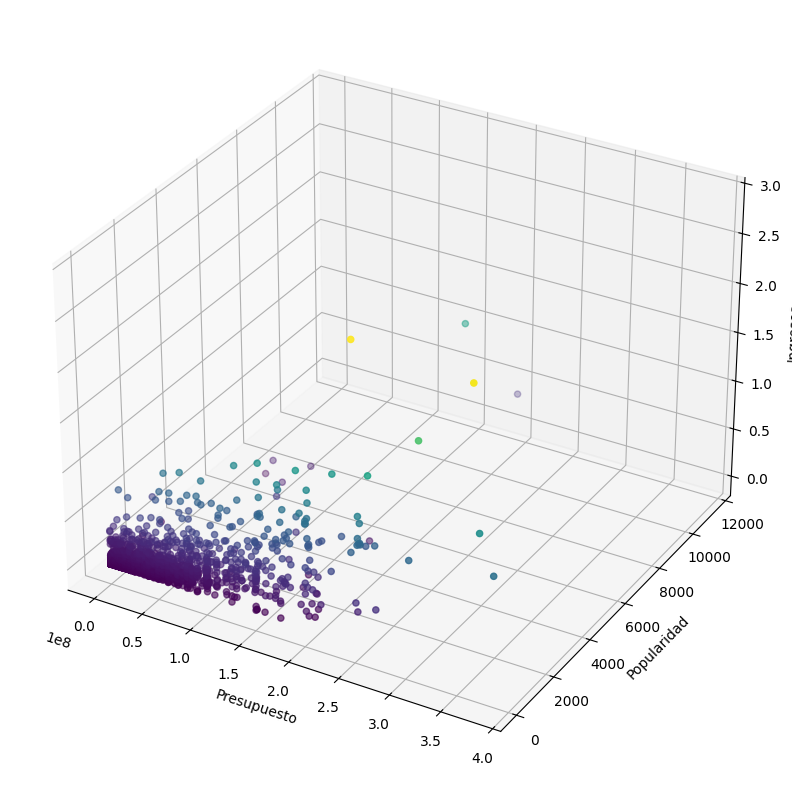

In [ ]:
# VAT
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(num_df['budget'], num_df['popularity'], num_df['revenue'], cmap='viridis', c=df['revenue'])
# ax.scatter(num_df['budget'], num_df['popularity'], num_df['revenue'], cmap='viridis', c='blue')
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Popularidad')
ax.set_zlabel('Ingresos')

plt.show()



lo que se logra visualizar aqui es la relacion entre presupuesto y popularidad usando los ingresos como altura

### 1.3 determinar cual es el numero de grupos a formar mas adecuado para los datos. Realizar una grafica de codo y explicar la razon.

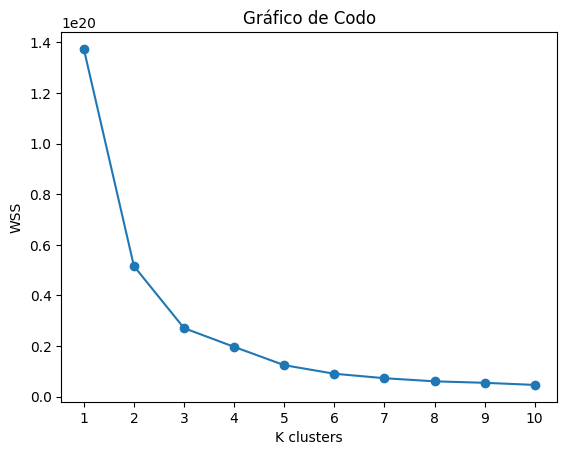

In [ ]:
#saber el numero de K clusters
numeroClusters = range(1,11)
wcss = []

for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(num_df)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss, marker='o')
plt.xticks(numeroClusters)
plt.xlabel("K clusters")
plt.ylabel("WSS")
plt.title("Gráfico de Codo")
plt.show()




Al analizar el grafico de codo, K=3 es un buen numero para los datos, ya que en la suma de wss disminuye rapidamente hasta 3 clusters y luego ya se vuelve mas gradual.

----
1.4 Algoritmos de k-medias y clustering jerarquico para agrupar

In [ ]:
#K medias
km = cluster.KMeans(n_clusters=3).fit(X)
print (km)


KMeans(n_clusters=3)


In [ ]:
centroides = km.cluster_centers_
print(centroides)

[[7.88014637e+06 4.63265379e+01]
 [7.24004642e+07 1.07337058e+02]
 [1.78033908e+08 3.42350575e+02]]


In [ ]:
#predecir 
y_kmeans = km.predict(X)
print (y_kmeans)


[0 2 0 ... 0 0 0]


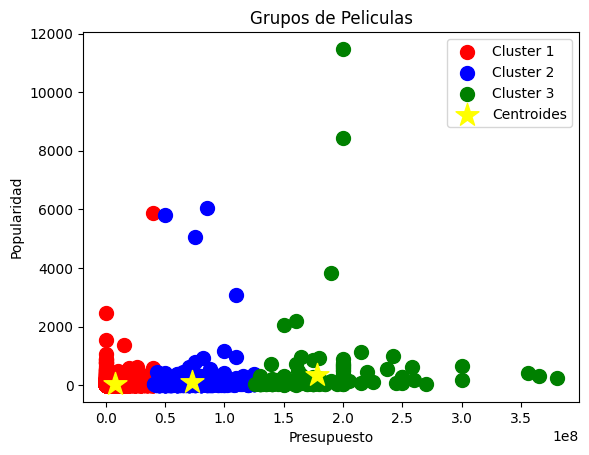

In [ ]:

plt.scatter(num_df.iloc[y_kmeans == 0]['budget'], num_df.iloc[y_kmeans == 0]['popularity'], 
            s=100, c='red', label="Cluster 1")
plt.scatter(num_df.iloc[y_kmeans == 1]['budget'], num_df.iloc[y_kmeans == 1]['popularity'], 
            s=100, c='blue', label="Cluster 2")
plt.scatter(num_df.iloc[y_kmeans == 2]['budget'], num_df.iloc[y_kmeans == 2]['popularity'], 
            s=100, c='green', label="Cluster 3")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroides')

plt.title("Grupos de Peliculas")
plt.xlabel("Presupuesto")
plt.ylabel("Popularidad")
plt.legend()



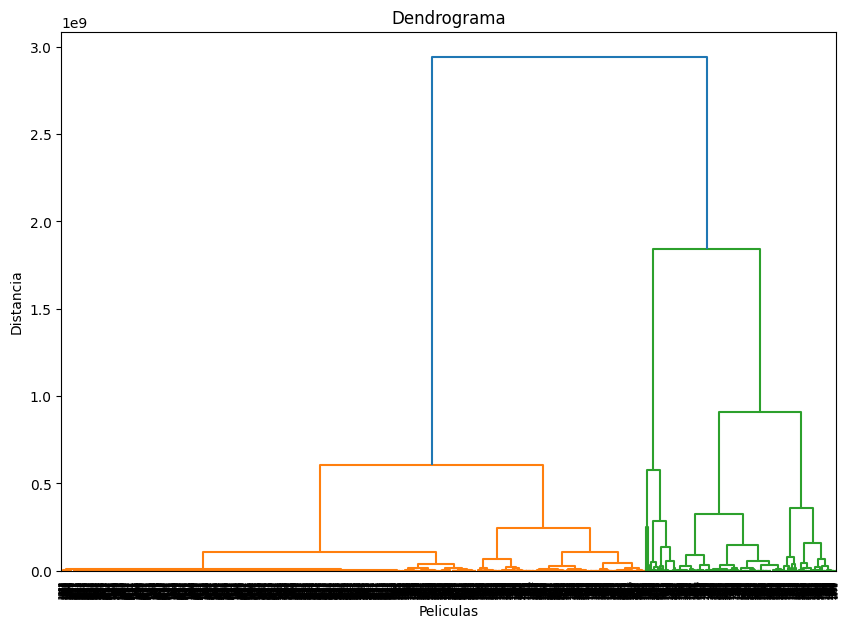

In [ ]:
#clustering jerargico
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist

# #calcular la matriz de distancias
dist = pdist(X, metric = 'euclidean')
#dendograma
plt.figure(figsize=(10, 7))
linkage = shc.linkage(X, method='ward')
dendro = shc.dendrogram(linkage)
plt.title("Dendrograma")
plt.xlabel("Peliculas")
plt.ylabel("Distancia")
plt.show()




--------
1.5 Determinar la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta

For n_clusters = 2 The average silhouette_score is : 0.7840679384761963
For n_clusters = 3 The average silhouette_score is : 0.7413795751880723
For n_clusters = 4 The average silhouette_score is : 0.7130838030430167
For n_clusters = 5 The average silhouette_score is : 0.7072625371248772
For n_clusters = 6 The average silhouette_score is : 0.7124995005899755


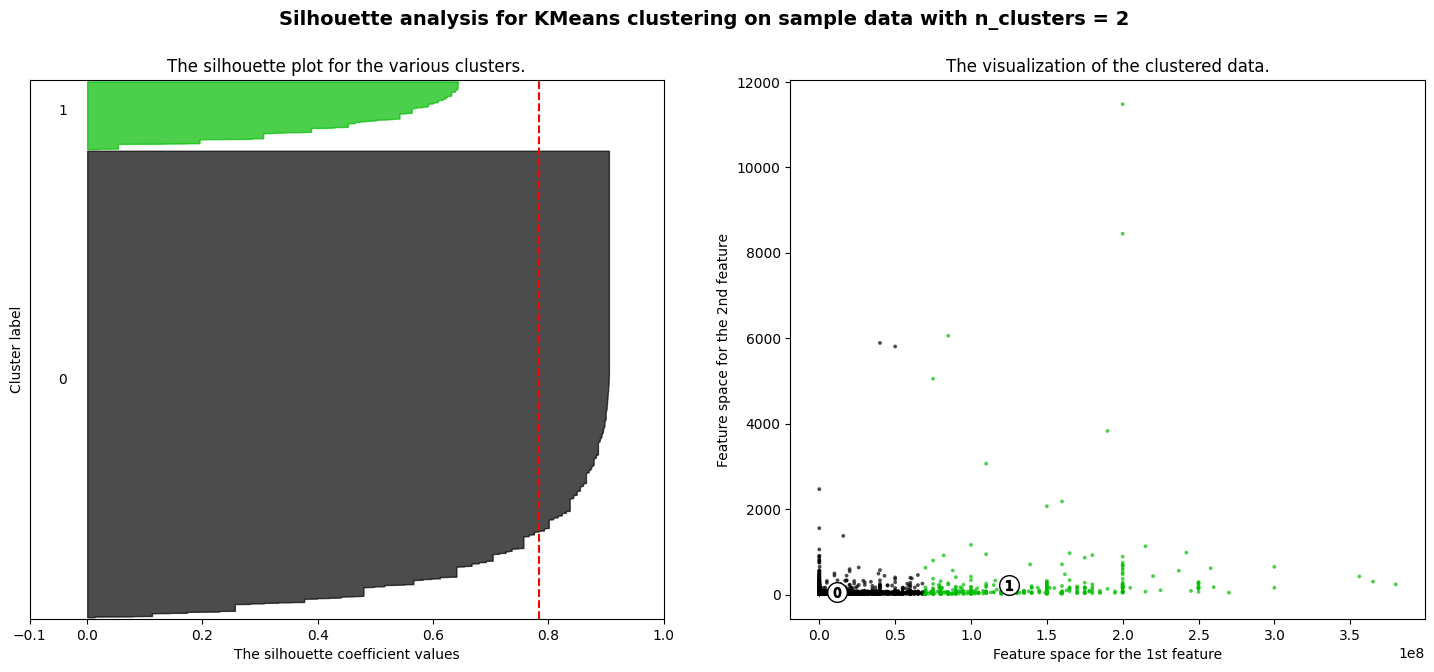

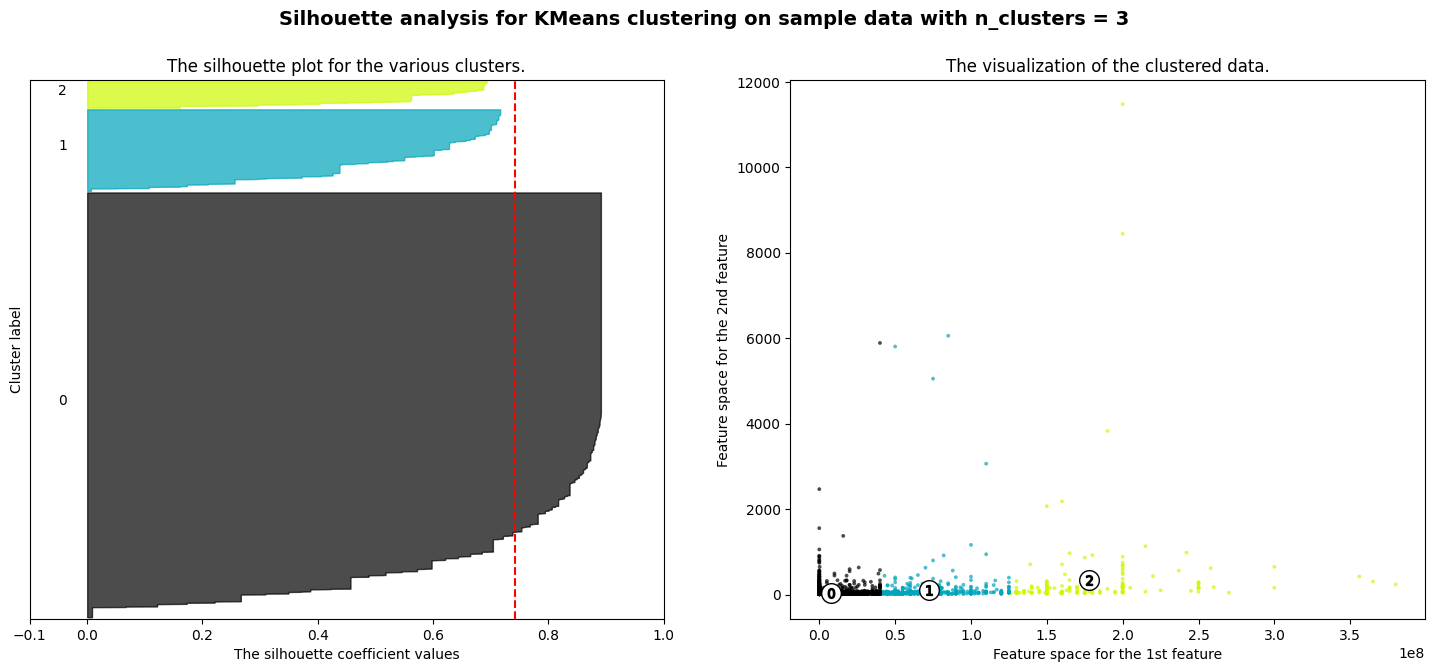

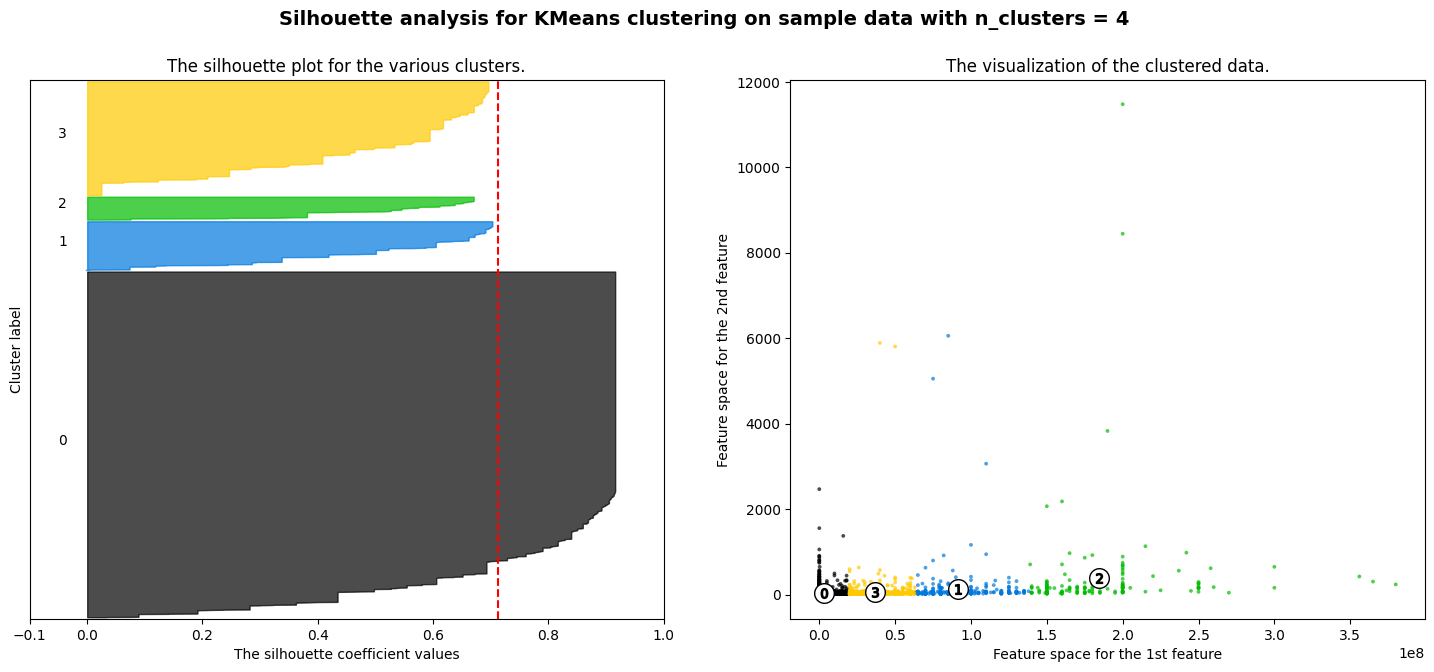

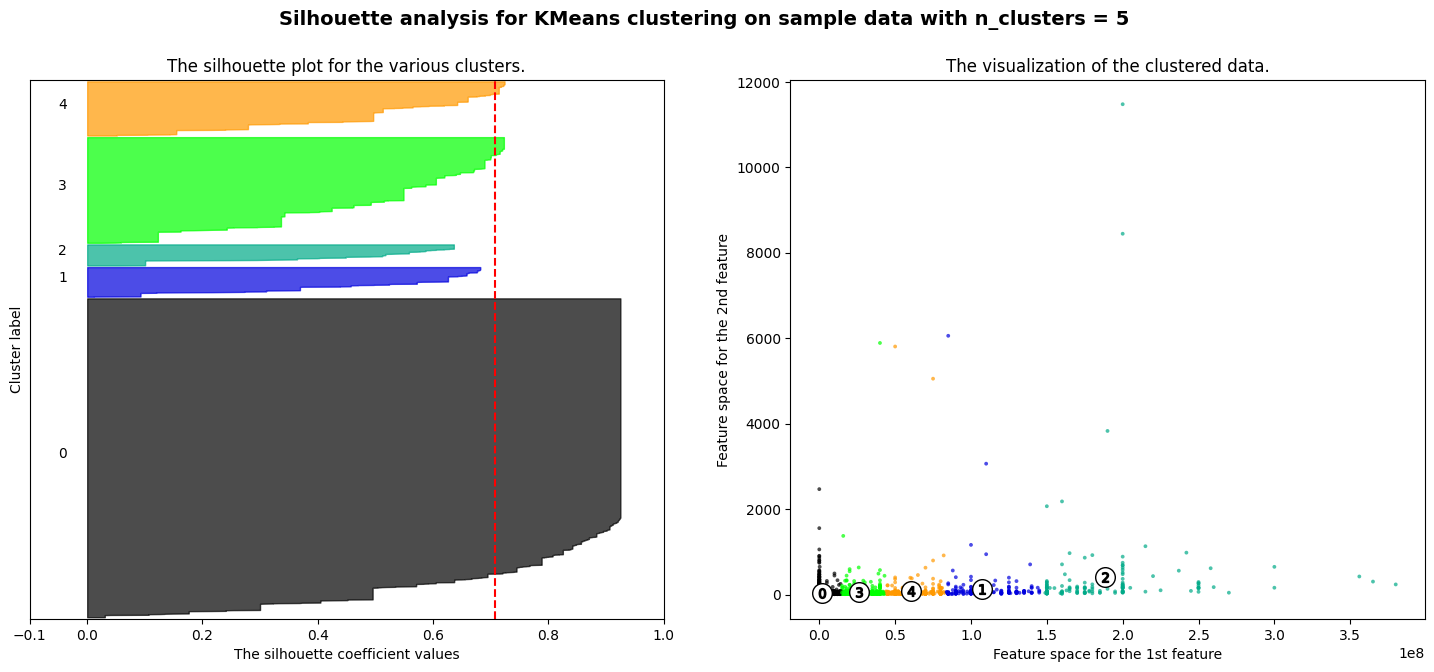

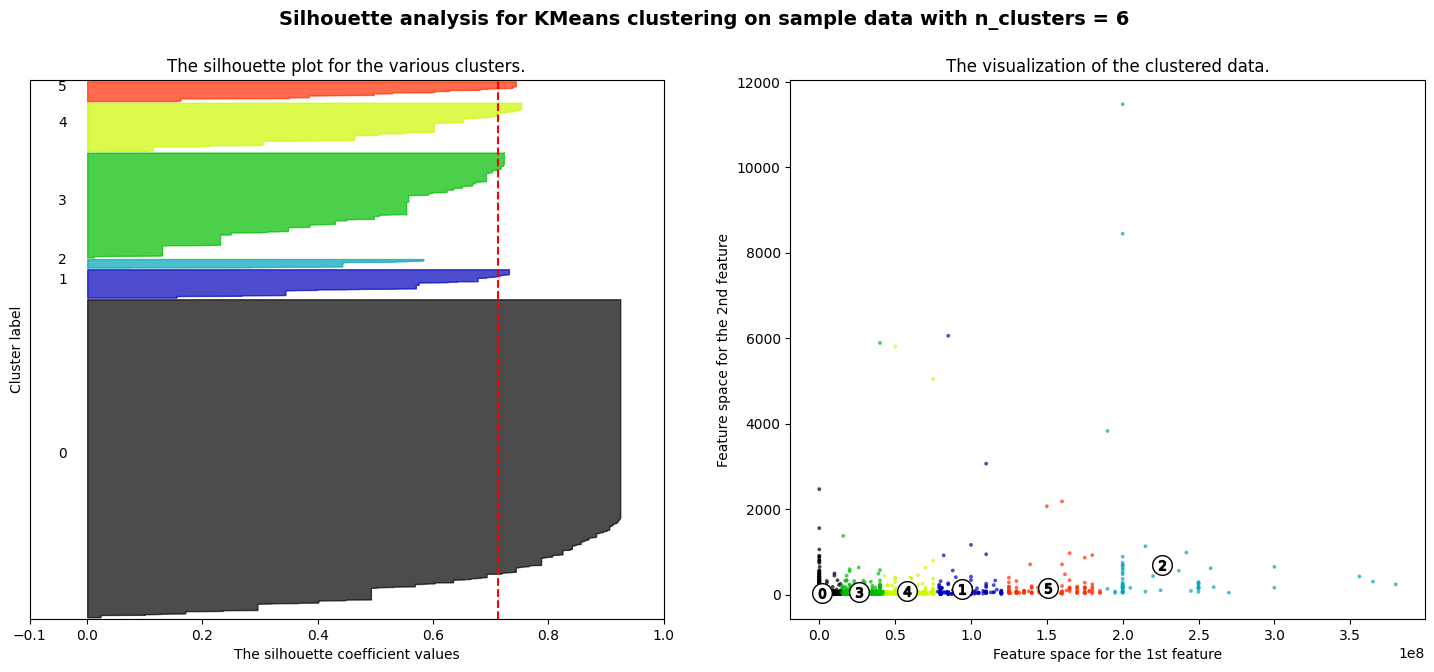

In [ ]:
'''
este algoritmo fue tomado del archivo que dice Clustering.ipynb de la carpeta de ejemplos en modulos de la clase
'''


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# convertir x en un np.array
X = X.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

El grafico de la silueta, lo que mide es que tan similar un punto a otros dentro del mismo cluster. Y este puede variar entre -1 a 1. Siendo un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus propios clusters y lejos de otros clusters.

Para este caso, en el gráfico, se ve que el número 2 de clusters es el que produce un resultado más equilibrado y el que tiene un valor de silueta más alto promedio. Aunque k=3 y k=6 también tienen valores de silueta promedio altos. Sin embargo, si se observa en el dendograma, se puede ver que hay un corte en el dendograma en 3 clusters que podría ser un mejor candidato para este caso, tomando en cuenta la compactación como la separación de clusters.



---------
1.6 
Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir. 

In [ ]:
#medidas de tendencia centrar para variables continuas en cada cluster

#agregar la columna de cluster al dataframe

df['Cluster'] = kmeans.labels_
print(df.head())

    id     budget                        genres  \
0    5    4000000               [Crime, Comedy]   
10  22  140000000  [Adventure, Fantasy, Action]   
11  24   30000000               [Action, Crime]   
14  28   31500000                  [Drama, War]   
16  35   75000000   [Animation, Comedy, Family]   

                                             homePage  \
0           https://www.miramax.com/movie/four-rooms/   
10  http://disney.go.com/disneyvideos/liveaction/p...   
11    http://www.miramax.com/movie/kill-bill-volume-1   
14                       http://www.apocalypsenow.com   
16                      http://www.simpsonsmovie.com/   

                                    productionCompany  \
0                                Miramax|A Band Apart   
10       Walt Disney Pictures|Jerry Bruckheimer Films   
11                               Miramax|A Band Apart   
14                   United Artists|American Zoetrope   
16  AKOM Production Company|Gracie Films|Rough Dra...   

   prod

In [ ]:
variables = ['budget', 'popularity', 'revenue']

for var in variables:
    print(f"Variable: {var}")
    print(df.groupby('Cluster')[var].describe())
    print("\n")


Variable: budget
          count          mean           std          min          25%  \
Cluster                                                                 
0        2098.0  3.945622e+06  8.784687e+06          0.0          0.0   
1          72.0  1.096382e+08  5.049476e+07    7000000.0   75000000.0   
2          58.0  1.503362e+08  6.444945e+07   10500000.0  106250000.0   
3         178.0  7.592733e+07  4.981236e+07          0.0   40000000.0   
4           2.0  2.965000e+08  8.414571e+07  237000000.0  266750000.0   
5          20.0  1.840000e+08  7.126526e+07   55000000.0  151500000.0   
6         305.0  4.699103e+07  2.937699e+07          0.0   26000000.0   
7         624.0  3.096855e+07  2.802633e+07          0.0   12925000.0   
8           7.0  2.407143e+08  7.328191e+07  150000000.0  195000000.0   
9         143.0  9.698441e+07  5.729464e+07          0.0   52500000.0   

                 50%          75%          max  
Cluster                                         
0       

In [ ]:
#medidas de tendencia central para variables categoricas en cada cluster
variables = ['genero_principal']
for var in variables:
    print(f"Variable: {var}")
    print(df.groupby('Cluster')[var].value_counts())
    print("\n-----------")

    #hallazgos interesantes para cada cluster
    print("Hallazgos interesantes para cada cluster")
    print("\nCluster 1")
    print(df[df['Cluster']==0][var].value_counts().head(5))

    print("\nCluster 2")
    print(df[df['Cluster']==1][var].value_counts().head(5))

    print("\nCluster 3")
    print(df[df['Cluster']==2][var].value_counts().head(5))

Variable: genero_principal
Cluster  genero_principal
0        Drama               462
         Comedy              290
         Animation           248
         Action              225
         Horror              162
                            ... 
9        Romance               3
         History               1
         Music                 1
         Mystery               1
         War                   1
Name: count, Length: 118, dtype: int64

-----------
Hallazgos interesantes para cada cluster

Cluster 1
genero_principal
Drama        462
Comedy       290
Animation    248
Action       225
Horror       162
Name: count, dtype: int64

Cluster 2
genero_principal
Action             21
Adventure          14
Animation          10
Comedy              7
Science Fiction     4
Name: count, dtype: int64

Cluster 3
genero_principal
Adventure          22
Action             18
Science Fiction     7
Fantasy             3
Family              3
Name: count, dtype: int64



En conclusión, los grupos obtenidos por el algoritmo K-means nos permiten interpretar y describir las películas en función de sus características. Aquí hay algunos hallazgos interesantes que podrían servir:

- Cluster 1: Películas con un bajo presupuesto (budget) y baja popularidad, que se encuentran dominadas poe el genero de drama, comedia, animacion y terror. Esto representa peliculas independientes o de un nicho en especifico. Lo que puede indicar que son que estas películas son menos rentables o menos populares.

- Cluster 2: Películas con un presupuesto alto y alta popularidad, que se encuentran dominadas por el género de acción, aventura, fantasia, animacion y ciencia ficcion. Estos suelen ser exitos en taquilla. Lo que indica que estas películas son más rentables y populares, y que su presupuesto es un factor importante en su éxito.

- Cluster 3: Películas con un presupuesto moderado y popularidad moderada a alta, que tiene un enfoque a acción, aventura, animacion, comedia y drama. Tienen un buen rendimiento comercial, pero no necesariamente son exitos en taquilla.

En conclusión, estos datos sirven para diferentes aplicaciones como lo puede ser en el área de marketing en donde se pueden enfocar en genéros y presupuestos específicos para tener un mayor alcance y porcentaje de cumplimiento. Otra aplicación, es en el área de producción en donde se puede decidir los géneros y presupuestos a considerar para futuras peliculas basadas en el éxito. Y por último, en la distribución, para la planificación de lanzamientos y estrategias de distribución de diferentes tipos de películas, según el cluster.


# Análisis de componentes principales 

#### 3.1 Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

Si es posible, hay muchas metodologías que permiten la conversión de las variables categóricas a variables numéricas para poder realizar el PCA. Por ejemplo, para la categoria de géneros se podría asignar un valor numérico a cada uno de ellos que funcione como identificador único, o en el caso de video puede ser remplazado por 1 y 0 en lugar de verdadero, falso. 
Sin embargo, puede que realizar esto no sea lo más eficiente ni favorezca al análisis, ya que el PCA está diseñado para variables numéricas continuas y puede que al convertir las categoricas en numéricas se pierda la interpretabilidad de los resultados y variables. Es de analizar el caso a profundidad, que tanto beneficio nos trae realizar esta conversión. Se deben analizar factores como la variabilidad, que es lo que se está categorizando y el propósito del análisis. 

In [ ]:
# PCA
# improtar librerias 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline


#### 3.2 Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlet

In [ ]:
df =  pd.read_csv('movies.csv', encoding = "ISO-8859-1")

# Seleccionar solo las columnas numéricas
numerical_columns = ['budget', 'revenue', 'popularity', 'runtime', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount']
df_numerical = df[numerical_columns]
print(df_numerical)

        budget      revenue  popularity  runtime  voteAvg  voteCount  \
0      4000000    4257354.0      20.880       98      5.7       2077   
1     21000000   12136938.0       9.596      110      6.5        223   
2     11000000  775398007.0     100.003      121      8.2      16598   
3     94000000  940335536.0     134.435      100      7.8      15928   
4     55000000  677387716.0      58.751      142      8.5      22045   
...        ...          ...         ...      ...      ...        ...   
9995         0          0.0      16.662      100      6.8        108   
9996         0          0.0     491.706       97      1.5          2   
9997         0          0.0     565.658      112      6.1         30   
9998         0          0.0       9.664       59      6.0          1   
9999    254056     254042.0      83.747        0      4.7          3   

      genresAmount  productionCoAmount  
0                2                   2  
1                3                   3  
2           

In [ ]:
#test de esfericidad de barlett 
chi_cuadrado, p_valor = calculate_bartlett_sphericity(df_numerical)
print('Valor Chi-cuadrado: ',chi_cuadrado)
print('Valor p:',p_valor)

Valor Chi-cuadrado:  21215.567606238357
Valor p: 0.0


In [ ]:
#ïndice de kmo
kmo,kmo_modelo = calculate_kmo(df_numerical)
print(f'Índice KMO: {kmo_modelo}')

Índice KMO: 0.7135881385261328


#### Resultados de análisis 
En base a los resultados obtenidos que "no es perfecto, pero el PCA nos puede ser útil". Este decir, en el caso del test de esfericidad de Barlett, al obtener una p < 0.05 se rechaza la hipotesis nula, hay correlacion entre las variables y se puede aplicar PCA. En el caso del KMO resulto con un valor de 0.71, que nos indica que no es perfecto, pero se puede aplicar PCA y nos sera de utilidad. 

#### 3.3 Haga un análisis de componentes principales con las variables numéricas, discuta los resultados e interprete los componentes

In [ ]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(df_numerical)

#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']
print(f'Cantidad de Componentes Generados: {len(modelo_pca.components_)}')

#Se convierte el arreglo en data frame
print("Resultado del PCA:")
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_numerical.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8']
)


Cantidad de Componentes Generados: 8
Resultado del PCA:


,budget,revenue,popularity,runtime,voteAvg,voteCount,genresAmount,productionCoAmount
PC1,0.513399,0.538566,0.145878,0.283999,0.184085,0.522359,0.153113,0.119341
PC2,-0.224481,-0.224912,-0.268339,0.556655,0.548847,-0.050114,-0.076960,0.455504
PC3,0.164427,-0.001728,-0.327314,-0.029654,-0.590920,-0.070093,0.248986,0.669966
PC4,-0.081576,-0.150865,0.379573,-0.130650,0.251594,-0.156273,0.844659,0.090942
PC5,-0.021283,-0.070849,0.800442,0.086505,-0.137936,-0.108966,-0.384213,0.409655
PC6,0.064465,-0.100291,0.097292,0.758708,-0.409216,-0.220984,0.184692,-0.387659
PC7,0.697682,-0.025686,-0.069535,-0.081838,0.255821,-0.650001,-0.114125,-0.008842
PC8,-0.401210,0.787947,-0.022256,0.041376,0.021567,-0.460529,0.020889,0.054536


#### Interpretacion de resultados


El PC1 está relacionado el **presupuesto y las ganancias**  
PC2 refleja una posible relación con la calificación y la duración de la película.  
PC3 podría estar relacionado con la popularidad versus la crítica.  
PC4 captura características de producción compleja.  
PC5 muestra una posible relación inversa entre popularidad y crítica.  
PC6 refleja la duración de la película.  
PC7 está relacionado con el presupuesto y los votos.  
PC8 refleja la escala de producción de las películas.